# Importing the Dependencies

In [1]:
!pip install pandas scikit-learn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data Collection and Pre Processing

In [3]:
Car_Data = pd.read_csv('car data.csv') # importing data

In [4]:
Car_Data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
Car_Data.shape

(301, 9)

In [6]:
Car_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
Car_Data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Replace Data into Numbers

In [8]:
Car_Data.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [9]:
Car_Data.replace({'Fuel_Type':{'Diesel':0,'Petrol':1,'CNG':2}},inplace=True) # Replace Data into numbers

/tmp/ipykernel_17437/660111235.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Car_Data.replace({'Fuel_Type':{'Diesel':0,'Petrol':1,'CNG':2}},inplace=True) # Replace Data into numbers


In [10]:
Car_Data.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [11]:
Car_Data.replace({'Seller_Type':{'Individual':1,'Dealer':2}},inplace=True) # Replace Data into numbers

/tmp/ipykernel_17437/2791884100.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Car_Data.replace({'Seller_Type':{'Individual':1,'Dealer':2}},inplace=True) # Replace Data into numbers


In [12]:
Car_Data.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [13]:
Car_Data.replace({'Transmission':{'Manual':0,'Automatic':2}},inplace=True)

/tmp/ipykernel_17437/2069247310.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Car_Data.replace({'Transmission':{'Manual':0,'Automatic':2}},inplace=True)


In [14]:
Car_Data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,2,0,0
1,sx4,2013,4.75,9.54,43000,0,2,0,0
2,ciaz,2017,7.25,9.85,6900,1,2,0,0
3,wagon r,2011,2.85,4.15,5200,1,2,0,0
4,swift,2014,4.60,6.87,42450,0,2,0,0
5,vitara brezza,2018,9.25,9.83,2071,0,2,0,0
6,ciaz,2015,6.75,8.12,18796,1,2,0,0
7,s cross,2015,6.50,8.61,33429,0,2,0,0
8,ciaz,2016,8.75,8.89,20273,0,2,0,0
9,ciaz,2015,7.45,8.92,42367,0,2,0,0


# Splitting Data for Training and Testing

In [15]:
X = Car_Data.drop(['Car_Name','Selling_Price'],axis=1)
Y = Car_Data.Selling_Price

In [16]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,1,2,0,0
1,2013,9.54,43000,0,2,0,0
2,2017,9.85,6900,1,2,0,0
3,2011,4.15,5200,1,2,0,0
4,2014,6.87,42450,0,2,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,2,0,0
297,2015,5.90,60000,1,2,0,0
298,2009,11.00,87934,1,2,0,0
299,2017,12.50,9000,0,2,0,0


In [17]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [18]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [19]:
X_Train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,1,2,0,0
249,2016,7.600,17000,1,2,0,0
277,2015,13.600,21780,1,2,0,0
194,2008,0.787,50000,1,1,0,0
244,2013,9.400,49000,0,2,0,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,1,2,0,0
22,2011,8.010,50000,1,2,2,0
72,2013,18.610,56001,1,2,0,0
15,2016,10.790,43000,0,2,0,0


In [20]:
Y_Train

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64

In [21]:
X_Test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
99,2010,20.450,50024,0,2,0,0
161,2014,0.826,23000,1,1,0,0
89,2014,6.760,40000,1,2,0,0
30,2012,5.980,51439,0,2,0,0
232,2015,14.790,12900,1,2,2,0
290,2014,6.400,19000,1,2,0,0
35,2011,7.740,49998,2,2,0,0
7,2015,8.610,33429,0,2,0,0
183,2013,0.470,21000,1,1,0,0
13,2015,7.710,26000,1,2,0,0


In [22]:
Y_Test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64

# Model Training

In [23]:
Car_Price_reg = LinearRegression()
Car_Price_reg.fit(X_Train,Y_Train) 

LinearRegression()

# Testing Model

In [24]:
Car_Price_reg.predict(X_Test)

array([10.44735893,  0.77488803,  4.26154956,  4.98571292,  9.84120255,
        4.24999886,  1.43274379,  7.47540306,  0.22562506,  5.17821673,
        6.21973729,  6.26781754,  2.17513438,  7.73707205,  1.90878759,
        1.80090329,  2.10280046,  1.9236449 ,  9.39967302,  4.25422212,
        1.56689974,  9.19859694,  1.53041507,  9.61159643,  0.90144732,
        8.16271663,  1.60180103, -3.1609433 ,  4.25870047,  2.14372584,
        3.50028258])

In [25]:
Y_Test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64

In [26]:
Car_Price_reg.score(X_Test,Y_Test)

0.864911301424692

In [32]:
Car_Price_reg.coef_

array([ 4.08772793e-01,  4.33272974e-01, -6.87750351e-06, -1.95833363e+00,
        1.03253727e+00,  7.52658935e-01, -8.62677935e-01])

In [33]:
Car_Price_reg.intercept_

np.float64(-821.7674221368912)

# Visualize Actual Price and Predicted Price

In [27]:
!pip install matplotlib

In [28]:
import matplotlib.pyplot as plt

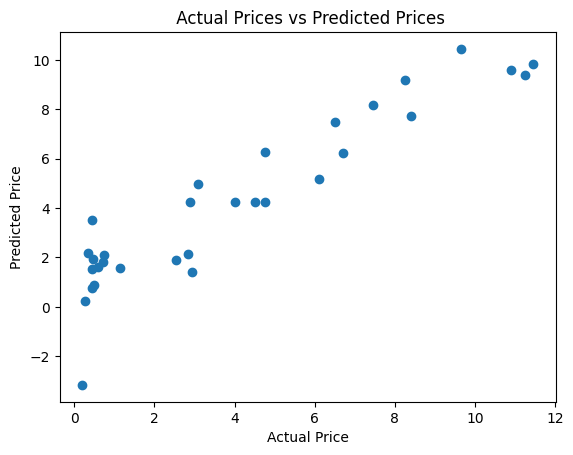

In [29]:
plt.scatter(Y_Test,Car_Price_reg.predict(X_Test) )
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Save Model

In [34]:
!pip install joblib

In [ ]:
import joblib

In [38]:
joblib.dump(Car_Price_reg, 'Car_Price_Model')

['Car_Price_Model']

In [41]:
CPP = joblib.load('Car_Price_Model')

In [42]:
CPP.predict(X_Test)

array([10.44735893,  0.77488803,  4.26154956,  4.98571292,  9.84120255,
        4.24999886,  1.43274379,  7.47540306,  0.22562506,  5.17821673,
        6.21973729,  6.26781754,  2.17513438,  7.73707205,  1.90878759,
        1.80090329,  2.10280046,  1.9236449 ,  9.39967302,  4.25422212,
        1.56689974,  9.19859694,  1.53041507,  9.61159643,  0.90144732,
        8.16271663,  1.60180103, -3.1609433 ,  4.25870047,  2.14372584,
        3.50028258])